In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1153).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (352).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (179).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (672).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (501).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (405).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (436).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (883).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (564).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (936).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (837).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (421).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1031).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (221).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVI

/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (230).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1195).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (182).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (817).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (631).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (369).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (777).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1249).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (366).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1139).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (152).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (179).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1004).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (297).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1219).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (556).png
/kaggle/input/sarscov2-ctscan-datas

In [2]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
from keras.utils import plot_model
from keras import models
from keras import layers
from keras.layers import Dense, GlobalAveragePooling2D, Layer
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,LambdaCallback
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, accuracy_score, confusion_matrix

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image

from keras.applications import VGG16
from keras.applications import MobileNet


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.utils.np_utils import to_categorical
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split, GroupShuffleSplit, GroupKFold
import os

In [4]:
disease_types=['COVID', 'non-COVID']
data_dir = '../input/sarscov2-ctscan-dataset/'
train_dir = os.path.join(data_dir)

In [5]:
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])      
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])

In [6]:
IMAGE_SIZE = 224
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) 
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [7]:
X = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
X = X / 255.
print(X.shape)

2481it [00:38, 64.03it/s]


(2481, 224, 224, 3)


In [8]:
Y = train['DiseaseID'].values
Y.shape

(2481,)

In [9]:
#Y = to_categorical(Y, num_classes=2)
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)


In [10]:
print(X_train.shape)
print( X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(1984, 224, 224, 3)
(497, 224, 224, 3)
(1984,)
(497,)


In [11]:
#getting ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1)) in the model, this is a trial fix 
Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1)) 
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
Y_val = np.asarray(Y_val).astype('float32').reshape((-1,1))
Y_train = to_categorical(Y_train, num_classes=2)
Y_val = to_categorical(Y_val, num_classes=2)

In [12]:
print(X_train.shape)
print( X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(1984, 224, 224, 3)
(497, 224, 224, 3)
(1984, 2)
(497, 2)


In [13]:
from keras.layers import  Flatten, Dense, Dropout
from keras.applications import VGG16
from keras.models import Model
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D

In [14]:
vgg16_model = VGG16(weights = 'imagenet', include_top = False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 0s 0us/step


In [15]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
print('Trainable weights '
      'before freezing the vgg16_model', len(vgg16_model.trainable_weights))

Trainable weights before freezing the vgg16_model 26


In [17]:
from keras import models
from keras import layers
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation = 'softmax')(x)
model = Model(vgg16_model.input,predictions)
for layer in vgg16_model.layers:
    layer.trainable = False
optimizer = Adam(lr=0.0002)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
print('Trainable weights '
      'After adding vgg16_model:', len(model.trainable_weights))

Trainable weights After adding vgg16_model: 12


In [19]:
print('Trainable weights '
      'After freezing the vgg16_model:', len(model.trainable_weights))

Trainable weights After freezing the vgg16_model: 12


In [20]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(1984, 224, 224, 3)
(497, 224, 224, 3)
(1984, 2)
(497, 2)


In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

training_datagen = ImageDataGenerator(rotation_range=40, 
                        width_shift_range=0.2, 
                        height_shift_range=0.2, 
                        zoom_range=0.2, 
                        horizontal_flip=True, 
                        vertical_flip=True,
                        shear_range=0.2) 

train_generator = training_datagen.flow(X_train, Y_train,batch_size=64)
Val_generator = training_datagen.flow(X_val,Y_val,batch_size=64)
training_datagen.fit(X_train)
checkpoint = ModelCheckpoint("vgg16_5.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='max')

history= model.fit(train_generator, epochs=30, validation_data= Val_generator,  callbacks=[checkpoint,early])

#model.save_weights("vgg16_1.h5")

Epoch 1/30
31/31 [==============================] - 479s 15s/step - loss: 0.9426 - accuracy: 0.5561 - val_loss: 0.6912 - val_accuracy: 0.5392

Epoch 00001: val_accuracy improved from -inf to 0.53924, saving model to vgg16_5.h5
Epoch 2/30
31/31 [==============================] - 473s 15s/step - loss: 0.8354 - accuracy: 0.6132 - val_loss: 0.6762 - val_accuracy: 0.6237

Epoch 00002: val_accuracy improved from 0.53924 to 0.62374, saving model to vgg16_5.h5
Epoch 3/30
31/31 [==============================] - 473s 15s/step - loss: 0.7970 - accuracy: 0.6248 - val_loss: 0.6658 - val_accuracy: 0.7042

Epoch 00003: val_accuracy improved from 0.62374 to 0.70423, saving model to vgg16_5.h5
Epoch 4/30
31/31 [==============================] - 471s 15s/step - loss: 0.7788 - accuracy: 0.6549 - val_loss: 0.6561 - val_accuracy: 0.7082

Epoch 00004: val_accuracy improved from 0.70423 to 0.70825, saving model to vgg16_5.h5
Epoch 5/30
31/31 [==============================] - 471s 15s/step - loss: 0.7066 - 

In [22]:
print(X_val.shape)
print(Y_val.shape)

(497, 224, 224, 3)
(497, 2)


In [24]:
y_pred = model.predict(X_val,batch_size=128) 
final_loss, final_accuracy = model.evaluate(X_val, Y_val) 
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

16/16 [==============================] - 93s 6s/step - loss: 0.4203 - accuracy: 0.8310
Final Loss: 0.4203241169452667, Final Accuracy: 0.8309859037399292


In [29]:
print(Y_val.shape)
print(y_pred.shape)

(497, 2)
(497, 2)


In [30]:
y_pred = np.argmax(y_pred, axis=1)
Y_val = np.argmax(Y_val, axis=1)

In [31]:
cm = confusion_matrix(Y_val, y_pred).ravel()
print(cm)

[198  55  29 215]


In [32]:
true_negative, false_Positive, false_negative, true_Positive = confusion_matrix(Y_val, y_pred).ravel()

In [ ]:
#.argmax(axis=1)

In [33]:
#print('y_test length = {}'. format(len(y_test)))
print('true_Positive = {}'.format(true_Positive))
print('true_negative = {}'.format(true_negative))
print('false_Positive = {}'.format(false_Positive))
print('false_negative = {}'.format(false_negative))

true_Positive = 215
true_negative = 198
false_Positive = 55
false_negative = 29


In [34]:
Specificity = true_negative/(true_negative+false_Positive)
Sensitivity = true_Positive/(true_Positive+false_negative)

print('f1 score =  %.3f'%f1_score(Y_val, y_pred))
print('Precision =  %.3f'%precision_score(Y_val, y_pred))
print('Specificity =  %.3f'%Specificity)
print('Sensitivity =  %.3f'%Sensitivity)

f1 score =  0.837
Precision =  0.796
Specificity =  0.783
Sensitivity =  0.881


from sklearn.metrics import classification_report, confusion_matrix
plt.matshow(confusion_matrix(test_Y_cat, pred_Y_cat))
print(classification_report(test_Y_cat, pred_Y_cat, target_names = disease_types)) 

y_pred = model_final.predict_classes(X_val)
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

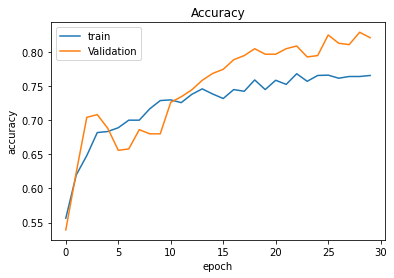

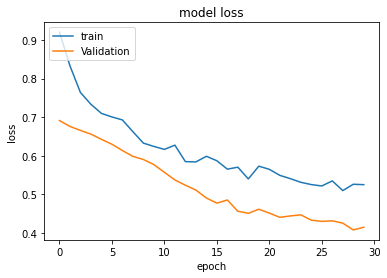

In [35]:
#accuracy and loss plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper left')
plt.show()


#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper left')
plt.show()

# Save neural network structure
model_structure = model_final.to_json()
f = Path("model_structurevgg.json")
f.write_text(model_structure)

# Save neural network's trained weights
model_final.save_weights("model_weightsvgg.h5")